# Aqui vamos estudar sobre underfitiing e Overfitting
### Objetivo é desenvolver um modelo para entender o overfitting/underfitting sem dividir os dados


In [2]:
#carregando os pacotes

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import tree

# Vamo gerar um exemplo de Overfitting para analisar e entender

In [39]:
# criando um DataFrame com dados de exemplo

dados = [
        [2, 9],[3, 10],[4, 11],[2, 9],[3, 10],[4, 11],[5, 15],[6, 17],[7, 18],[8, 21],[9, 25],[10, 27],[11, 33],
        [12, 45],[13, 47],[16, 49],[19, 55],[22, 57],[25, 59],[28, 61],[31, 61],[34, 61.5],[37, 62],[40, 62],
        [40, 62],[43, 62.2],[47, 62],[50, 61],[53, 60],[56, 59],[59, 58],[62, 57],[65, 56],[68, 55],
        ]

In [40]:
df = pd.DataFrame(dados, columns=['Idade', 'Peso'])
df

,Idade,Peso
0,2,9.0
1,3,10.0
2,4,11.0
3,2,9.0
4,3,10.0
5,4,11.0
6,5,15.0
7,6,17.0
8,7,18.0
9,8,21.0


In [41]:
# o X será nossa variável preditora
x = df['Idade'].values

In [42]:
# o Y será o target
y = df['Peso'].values

In [43]:
# reshape para converter os dados de x em um array
x = x.reshape(-1,1)

In [44]:
# criando o modelo
modelo = tree.DecisionTreeRegressor() #arvore de decisão

In [45]:
#treinar o modelo
modelo.fit(x,y)

DecisionTreeRegressor()

In [47]:
# gerar as previsões
# utilizar.predict()

predicao = modelo.predict(x)
predicao


array([ 9. , 10. , 11. ,  9. , 10. , 11. , 15. , 17. , 18. , 21. , 25. ,
       27. , 33. , 45. , 47. , 49. , 55. , 57. , 59. , 61. , 61. , 61.5,
       62. , 62. , 62. , 62.2, 62. , 61. , 60. , 59. , 58. , 57. , 56. ,
       55. ])

<function matplotlib.pyplot.show(close=None, block=None)>

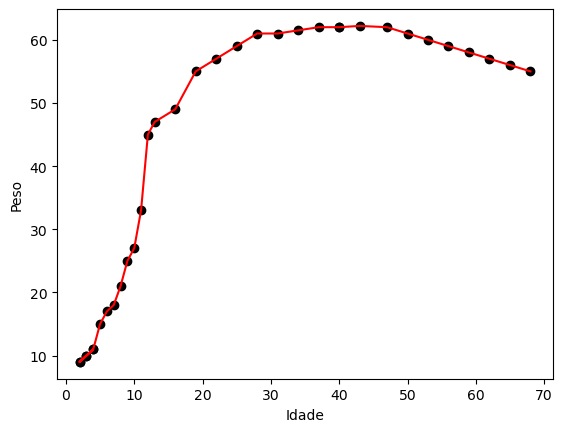

In [48]:
# avavalir no gráfico a situaçao de overfitting

plt.scatter(x,y, color='black')
plt.plot(x, predicao, color='red')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.show

### resumo: 
A linha vermelha é a predição do modelo, e nesse caso o overfit memorizou 

In [49]:
# Outro dado de comrar o overfitting é avaliar o porcentual de erro
# Na regressão quanto menor o erro é melhor

Perc_Erro = mean_absolute_percentage_error(y, predicao) * 100
print('O percential de Erro: ', round(Perc_Erro,2))

O percential de Erro:  0.0


In [ ]:
# avaliar e comparar os dados

df['Peso_Previsao'] = predicao
df.head(10)

# vemos aqui que ele não esta errando

,Idade,Peso,Peso_Previsao
0,2,9.0,9.0
1,3,10.0,10.0
2,4,11.0,11.0
3,2,9.0,9.0
4,3,10.0,10.0
5,4,11.0,11.0
6,5,15.0,15.0
7,6,17.0,17.0
8,7,18.0,18.0
9,8,21.0,21.0


# Agora um exemplo de Underfitting para analisar e entender


In [51]:
# Criar um DataFrame
dados = [
        [2, 9],[3, 10],[4, 11],[2, 9],[3, 10],[4, 11],[5, 15],[6, 17],[7, 18],[8, 21],[9, 25],[10, 27],[11, 33],
        [12, 45],[13, 47],[16, 49],[19, 55],[22, 57],[25, 59],[28, 61],[31, 61],[34, 61.5],[37, 62],[40, 62],
        [40, 62],[43, 62.2],[47, 62],[50, 61],[53, 60],[56, 59],[59, 58],[62, 57],[65, 56],[68, 55],
        ]

In [52]:
df = pd.DataFrame(dados, columns=['Idade', 'Peso'])

In [53]:
# x variavel pedritora

x = df['Idade'].values

In [54]:
y = df['Peso'].values

In [55]:
# reshape
x = x.reshape(-1,1)

In [ ]:
# criando o mesmo modelo
# aqui vamos mexer no hiperparametro para ntentar tirar o overfit
modelo = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf= 40)

In [57]:
modelo.fit(x,y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=40)

In [58]:
predicao = modelo.predict(x)
predicao

array([41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647, 41.99117647,
       41.99117647, 41.99117647, 41.99117647, 41.99117647])

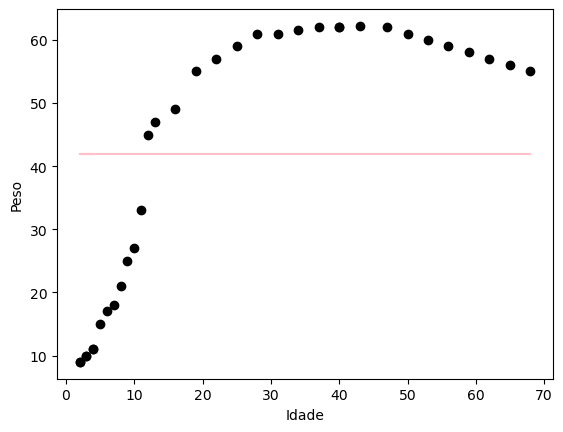

In [ ]:
# agora análise atraves do grafico

plt.scatter(x,y, color='black')
plt.plot(x, predicao, color='pink')
plt.xlabel("Idade")
plt.ylabel("Peso")
plt.show()

# saída: 

In [ ]:
# avaliar  erro
error = mean_absolute_percentage_error(y, predicao) * 100
print('O percentual de Erro: ', round(error,2))

# quase 100% de acerto

O percentual de Erro:  94.3


In [ ]:
# avaliar e comparar os dados

df['Peso_Previsao'] = predicao
df.head(10)

# resumindo: o underfit não aprendeu nada com os erros

,Idade,Peso,Peso_Previsao
0,2,9.0,41.991176
1,3,10.0,41.991176
2,4,11.0,41.991176
3,2,9.0,41.991176
4,3,10.0,41.991176
5,4,11.0,41.991176
6,5,15.0,41.991176
7,6,17.0,41.991176
8,7,18.0,41.991176
9,8,21.0,41.991176


# Ou seja, o overfit/underfit são modelos que não dá pra ser utilizado
### No meio disso tem outros modelos de balanceamento, generalização ... 

## A seguir um exemplo de modelo com boa generalização dos dados, sobre a forma correta

In [62]:
# criando DataFrame / mesmo DataFrame utilizado nos modelos anteriores

dados = [
        [2, 9],[3, 10],[4, 11],[2, 9],[3, 10],[4, 11],[5, 15],[6, 17],[7, 18],[8, 21],[9, 25],[10, 27],[11, 33],
        [12, 45],[13, 47],[16, 49],[19, 55],[22, 57],[25, 59],[28, 61],[31, 61],[34, 61.5],[37, 62],[40, 62],
        [40, 62],[43, 62.2],[47, 62],[50, 61],[53, 60],[56, 59],[59, 58],[62, 57],[65, 56],[68, 55],
        ]

In [63]:
df = pd.DataFrame(dados, columns=['Idade', 'Peso'])

In [64]:
x = df['Idade'].values

In [65]:
y = df['Peso'].values

In [66]:
#reshape
x = x.reshape(-1,1)

In [67]:
# modelo

modelo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=7)

In [68]:
modelo.fit(x,y)

DecisionTreeRegressor(max_depth=3, min_samples_split=7)

In [69]:
predicoes = modelo.predict(x)

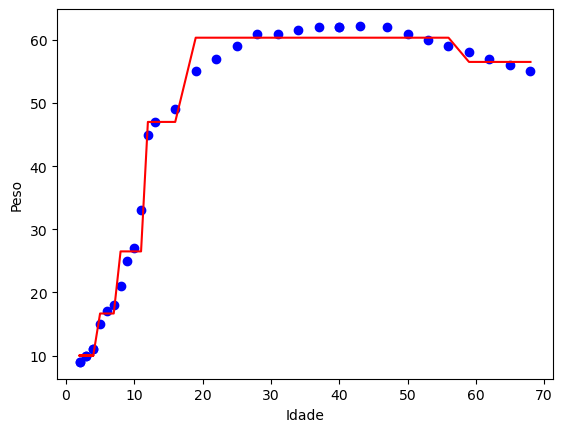

In [ ]:
# analisar o gráfico
plt.scatter(x,y, color='blue')
plt.plot(x, predicoes, color='red')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.show()

# o modelo está bem balanceado 

In [ ]:
# comprovando a boa generalizacao 
erro = mean_absolute_percentage_error(y, predicoes) * 100
print('Percentual de Erro: ', round(erro,2))

# 5 % de error

Percentual de Erro:  4.99


In [72]:
# avaliando e comparando os dados
df['Peso_Previsao'] = predicoes
df.head(10)

,Idade,Peso,Peso_Previsao
0,2,9.0,10.000000
1,3,10.0,10.000000
2,4,11.0,10.000000
3,2,9.0,10.000000
4,3,10.0,10.000000
5,4,11.0,10.000000
6,5,15.0,16.666667
7,6,17.0,16.666667
8,7,18.0,16.666667
9,8,21.0,26.500000


## Resumindo:
- x = Feature/Caracteristica
- y = Label / Rotulo

x é sempre a entrada (o que você usa para prever).

y é sempre a saída (o que você quer prever).

O reshape é usado para ajustar o formato dos dados. No seu caso, você usou x.reshape(-1, 1). Vamos entender por quê.
Usamos reshape(-1, 1) para transformar o array 1D em 2D.